In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
wines = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\wine.csv')

In [4]:
X = wines.iloc[:, 1: ].values
y = wines['type'].values

In [5]:
## standardize the data, then do singular value decomposition(SVD) on the training data matrix

A = X - X.mean(axis = 0)  

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (178, 13)
np.shape(sigma) = (13,)
np.shape(Vt) = (13, 13) 



In [6]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [7]:
# So after SVD, find the first four principal components found based on the dimension of Vt.

PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

In [8]:
def colors(y):
    if y == 1:
        return('red')
    elif y == 2:
        return('lightseagreen')
    else:
        return('magenta')

c = [colors(type) for type in y]

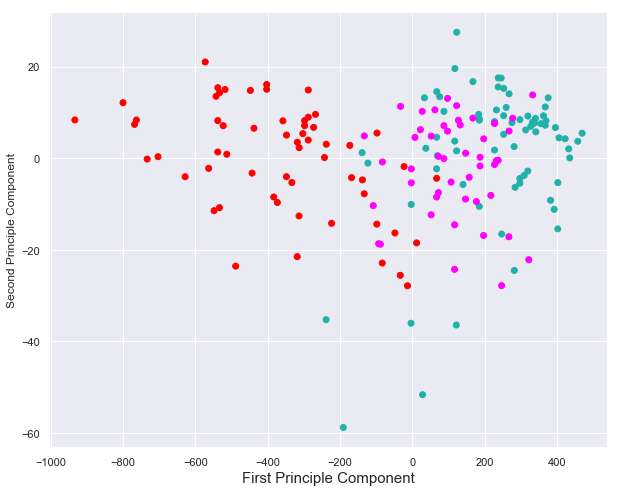

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

##### Here we get the 2-D projection of the original datasets. It should be noticed that every principle component is a linear combination of other vectors, so here we cannot give explicit meaning to a principle component. This could be helpless when we want a model(like a financial pricing model) to be highly explainable.

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
per_var = [36.2  19.21 11.12  7.07  6.56  4.94  4.24  2.68  2.22  1.93  1.74  1.3
  0.8 ] 



##### By using the PCA from sklearn, the result is basically the same as the manual PCA shown as above. Only two principle components could fully explain the variance.

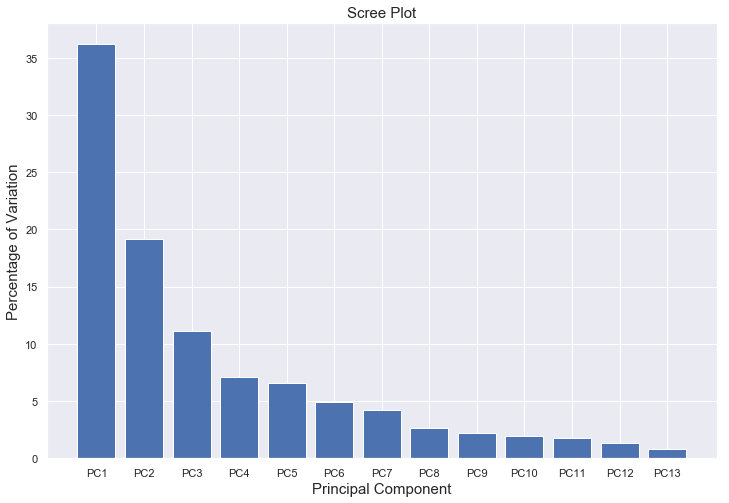

In [11]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1, 14)]

plt.figure(figsize = (12, 8))
plt.bar(x = range(1, 14), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [12]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates

# for example, here PC1 = 0.522 * sepal_length + 0.372 * sepal_width - 0.721 * petal_length - 0.262 * petal_width

Xdf = wines.iloc[:, 1: ]

features = list(set(Xdf.columns) - {"species"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Total phenols,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
Flavanoids,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
OD280/OD315 of diluted wines,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
Ash,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
Proline,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
Hue,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
Alcalinity of ash,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
Malic acid,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
Color intensity,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
Magnesium,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


##### So we can see that every principal component is a very complicated linear combination of each attributes.

In [13]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [23]:
# we add to the previous table the labels for each flower

y_series = pd.Series(y)

projected_df = pd.concat([pca_df, y_series], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,0
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,3


In [24]:
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,0,color
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,1,red
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,1,red
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,1,red
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,1,red
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427,3,magenta
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371,3,magenta
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078,3,magenta
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866,3,magenta


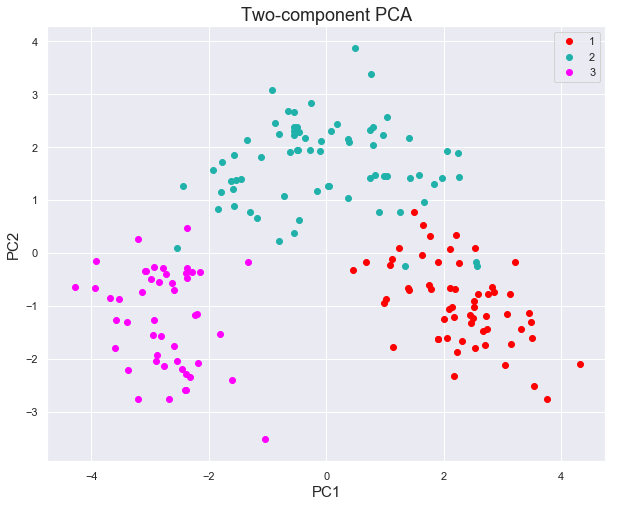

In [27]:
targets = [1, 2, 3]
colors = ["red", "lightseagreen", "magenta"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df[0] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

In [22]:
y_series

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Length: 178, dtype: int64